# 기본 필요 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os
from glob import glob
import io
import numpy as np
from io import BytesIO

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max.colwidth',100)
pd.options.display.max_columns = 100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. 데이터 불러오기 


In [11]:
df = pd.read_csv('small_total_train_set.csv', encoding='utf-8-sig')
df.head()
df.shape

,Unnamed: 0,Unnamed: 0.1,channel_name,subscribers,video_name,days_after_upload,video_duration,hits,likes_num,dislikes_num,category_id,thumbnail
0,0,0,복덩이,104000,"너무나맛있는 '알타리묵은지찜과' ""앞치마에그림"" Altari old paper steamed ' And 'picture in apron'",10,311,1126,40,1,0,https://i.ytimg.com/vi/al52wJgMGyI/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ=...
1,1,1,복덩이,104000,헌옷으로만든 [앞치마]와 '민들레' 겉절이 'Apron' made with old clothes and a beautiful life,11,416,1067,85,3,0,https://i.ytimg.com/vi/-xx7shznKec/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ=...
2,2,2,복덩이,104000,탈모와다이어트에 탁월한고급진 '느타리버섯볶음' 과 프로방스 창문그리기 Stir-fried 'Oyster Mushroom' and drawing Provence window,12,265,860,64,0,0,https://i.ytimg.com/vi/m7KC7oEKKuo/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ=...
3,3,3,복덩이,104000,감기 면연력 간기능보호에 탁월한 '도라지튀김' '민들레튀김' '라벤다그리기' Fried bellflower Dandelion fried lavender,13,419,1116,76,1,0,https://i.ytimg.com/vi/FYeuMGEgNWA/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ=...
4,4,4,복덩이,104000,진달래화전 부침 복덩이표 바삭바삭한 쫀득쫀득비법공개,14,287,622,47,2,0,https://i.ytimg.com/vi/UjLKW2fjkyA/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ=...


(13685, 12)

In [12]:
category = df['category_id']
thumbnail = df['thumbnail']

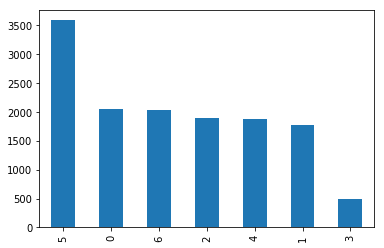

In [13]:
category.value_counts().plot.bar()

In [14]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

- 밑에 저장한 파일 있으니, 돌리지말고 쓰기
- image_train_test_split.npy

In [22]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail[0:1] :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
#     img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

#     # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
#     img = preprocess_input(img)
    X.append(img)

<Figure size 432x288 with 0 Axes>

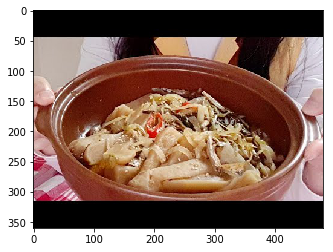

(360, 480, 3)

In [25]:
for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i]/256)
    plt.show()
    X[i].shape

In [0]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    img = preprocess_input(img)
    X.append(img)

In [0]:
X = np.array(X)
Y = np.array(category)
Y = pd.get_dummies(Y).to_numpy()

In [17]:
X.shape
Y.shape

(13685, 64, 64, 3)

(13685, 7)

In [0]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)
np.save("image_train_test_split.npy", xy)
print("ok,", len(Y))

ok, 13685


# 데이터 다시 열고 확인

In [0]:
# !pip install numpy==1.16.1
import numpy as np

In [26]:
# 데이터 열기 

# 혹시 ValueError: Object arrays cannot be loaded when allow_pickle=False => !pip install numpy==1.16.1
X_train, X_valid, y_train, y_valid = np.load("image_train_test_split.npy", allow_pickle=True)

In [27]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((10263, 64, 64, 3), (3422, 64, 64, 3), (10263, 7), (3422, 7))

- 이미지 확인해보기

In [0]:
for i in range(3):
    plt.figure()
    plt.imshow(X_train[i]/256)
    plt.show()

# CNN_Sequential

In [28]:
# 카테고리 지정하기
categories = category.unique()
nb_classes = len(categories)
# 이미지 크기 지정하기
image_w = 64
image_h = 64

# 데이터 정규화하기(0~1사이로)
X_train = X_train.astype("float") / 64 # 256 으로 하면?
X_valid  = X_valid.astype("float")  / 64
print('X_train shape:', X_train.shape) # 74%
print('X_valid shape:', X_valid.shape)


X_train shape: (10263, 64, 64, 3)
X_valid shape: (3422, 64, 64, 3)


In [29]:
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3))) #전체 train에 돌릴때는 32로
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
last_layer = model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

# 모델 요약
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)      

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 10263 samples, validate on 3422 samples
Epoch 1/20
10263/10263 [==============================] - 215s 21ms/step - loss: 1.1010 - accuracy: 0.6034 - val_loss: 0.8685 - val_accuracy: 0.7037
Epoch 2/20
10263/10263 [==============================] - 201s 20ms/step - loss: 0.7845 - accuracy: 0.7252 - val_loss: 0.7131 - val_accuracy: 0.7569
Epoch 3/20
10263/10263 [==============================] - 201s 20ms/step - loss: 0.6323 - accuracy: 0.7806 - val_loss: 0.6806 - val_accuracy: 0.7715
Epoch 4/20
10263/10263 [==============================] - 202s 20ms/step - loss: 0.5145 - accuracy: 0.8241 - val_loss: 0.6138 - val_accuracy: 0.7940
Epoch 5/20
10263/10263 [==============================] - 203s 20ms/step - loss: 0.4253 - accuracy: 0.8559 - val_loss: 0.7193 - val_accuracy: 0.7838
Epoch 6/20
10263/10263 [==============================] - 213s 21ms/step - loss: 0.3415 - accuracy: 0.8848 - val_loss: 0.6941 - val_accuracy: 0.7943
Epoch 7/20
10263/10263 [==============================] -

(0, 1)

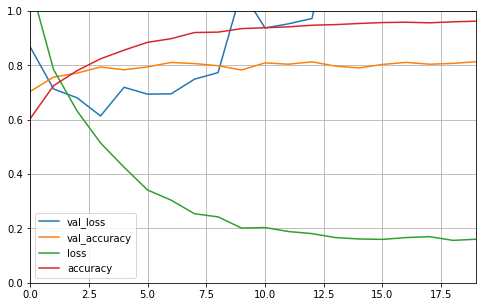

In [11]:
history1 = model.fit(X_train, y_train, batch_size=32, nb_epoch=20 , validation_data=(X_valid, y_valid))

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
# 모델 평가하기 
score = model.evaluate(X_valid, y_valid)
print('loss=', score[0])        # loss
print('accuracy=', score[1])    # acc

3422/3422 [==============================] - 19s 5ms/step
loss= 1.4476018495060838
accuracy= 0.8135592937469482


- 모델 불러오기

In [31]:
from keras.models import model_from_json   
json_file = open("seq_model_81.json", "r")   
loaded_model_json = json_file.read()   
json_file.close()   
loaded_model = model_from_json(loaded_model_json)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 1 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 1 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[1 0 0 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 1 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 1 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 1 0 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[1 0 0 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 0 1]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 1 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 0 1]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 0 1]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 1 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 1 0 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 1 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 0 1]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 1 0 0 0 0 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 1 0]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 0 0 1]')

[]

[]

<BarContainer object of 7 artists>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[0 0 0 0 1 0 0]')

[]

[]

<BarContainer object of 7 artists>

C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


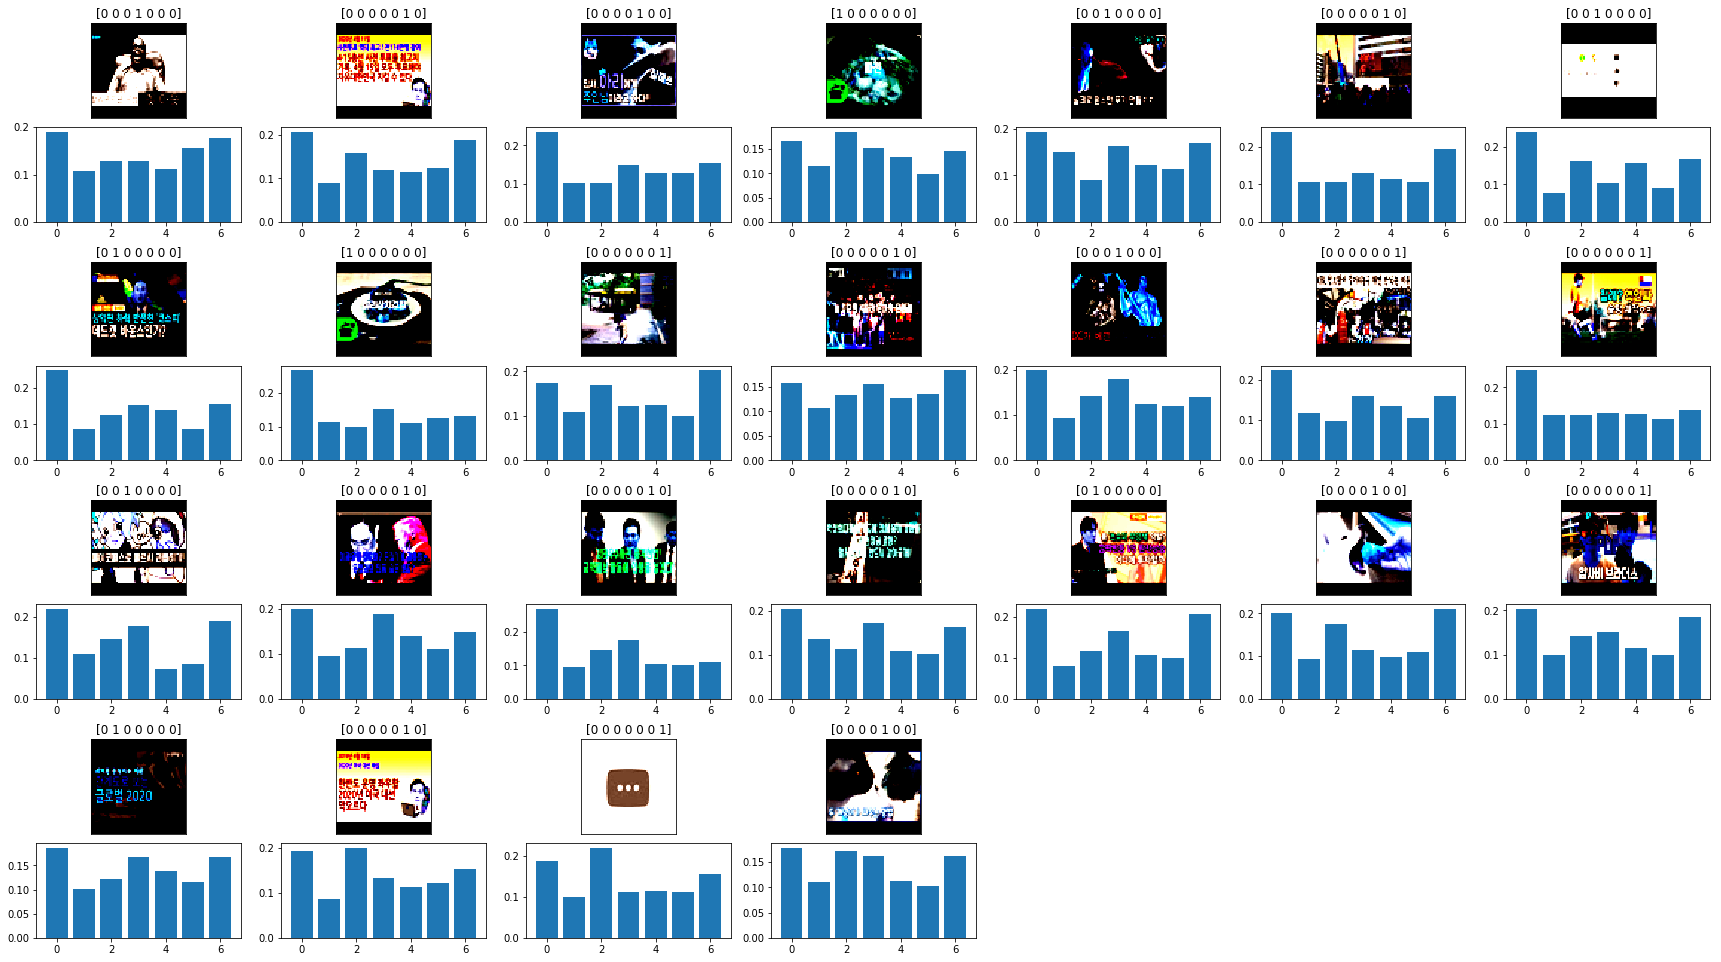

In [36]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(7, 7, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = np.random.randint(0,len(X_valid))
    pred_image = np.array([X_valid[rnd_number]])
    pred_class = categories[y_valid[rnd_number]]#get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = loaded_model.predict(pred_image).reshape(7)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)
fig.show()


- test
- 게임같은건 진짜 게임으로 분류하는데

In [17]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3

i = "https://i.ytimg.com/vi/zqXKj8A5Nsw/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&amp;rs=AOn4CLBVKGeAvOXF3LIxv-gHm7JXCty6BA"
url = i+str('.jpg')
response = requests.get(url, stream=True) 
test_img= Image.open(io.BytesIO(response.content)) 
    
test_img = test_img.convert("RGB")
test_img = test_img.resize((image_w, image_h))
test_img = image.img_to_array(test_img)

 # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
test_img = preprocess_input(test_img)
test_img = test_img.astype("float") / 256
test_img = test_img.reshape(-1, 64, 64,3)

In [18]:
# 예측
pred = model.predict(test_img)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print('data category : ',categories[result[0]])
# category ( 0: cooking , 1: economy, 2: game, 3: movie, 4: pets, 5: sports)

data category :  2


In [ ]:
<img id="img" class="style-scope yt-img-shadow" alt="" width="246" src="https://i.ytimg.com/vi/BmDT1eq23l4/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&amp;rs=AOn4CLAuNtF1J_P6ZCCQRFTEt2rTcTdv0g">

In [10]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3

i = "https://i.ytimg.com/vi/BmDT1eq23l4/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&amp;rs=AOn4CLAuNtF1J_P6ZCCQRFTEt2rTcTdv0g"
url = i+str('.jpg')
response = requests.get(url, stream=True) 
test_img= Image.open(io.BytesIO(response.content)) 

test_img.save('game.jpg')
    
test_img = test_img.convert("RGB")
test_img = test_img.resize((image_w, image_h))
test_img = image.img_to_array(test_img)

 # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
test_img = preprocess_input(test_img)
test_img = test_img.astype("float") / 256
test_img = test_img.reshape(-1, 64, 64,3)

np.save('games_array',test_img)
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np



- 학습 완료된 모델 저장

In [19]:
# 학습 완료된 모델 저장
seq_model_81_json = model.to_json()
with open("seq_model_81.json", "w") as json_file : 
    json_file.write(seq_model_81_json)
model.save_weights("seq_model_81.h5")
print("Saved model to disk")

4611

Saved model to disk


- 저장된 모델 가져오기

In [0]:
# from keras.models import model_from_json   
# json_file = open("model.json", "r")   
# loaded_model_json = json_file.read()   
# json_file.close()   
# loaded_model = model_from_json(loaded_model_json)  